In [1]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def get_sinusoidal_positional_encoding(d_model: int, max_len: int = 4096):
    # Empty encodings vectors
    encodings = torch.zeros(max_len, d_model)
    # Position indexes
    position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
    # $2 * i$
    two_i = torch.arange(0, d_model, 2, dtype=torch.float32)
    # $10000^{\frac{2i}{d_{model}}}$
    div_term = torch.exp(two_i * -(math.log(10000.0) / d_model))
    # $PE_{p,2i} = sin\Bigg(\frac{p}{10000^{\frac{2i}{d_{model}}}}\Bigg)$
    encodings[:, 0::2] = torch.sin(position * div_term)
    # $PE_{p,2i + 1} = cos\Bigg(\frac{p}{10000^{\frac{2i}{d_{model}}}}\Bigg)$
    encodings[:, 1::2] = torch.cos(position * div_term)
    # Add batch dimension
    encodings = encodings.unsqueeze(1).requires_grad_(False)
    return encodings

In [9]:
positional_encoding = get_sinusoidal_positional_encoding(128, 512).squeeze().numpy()

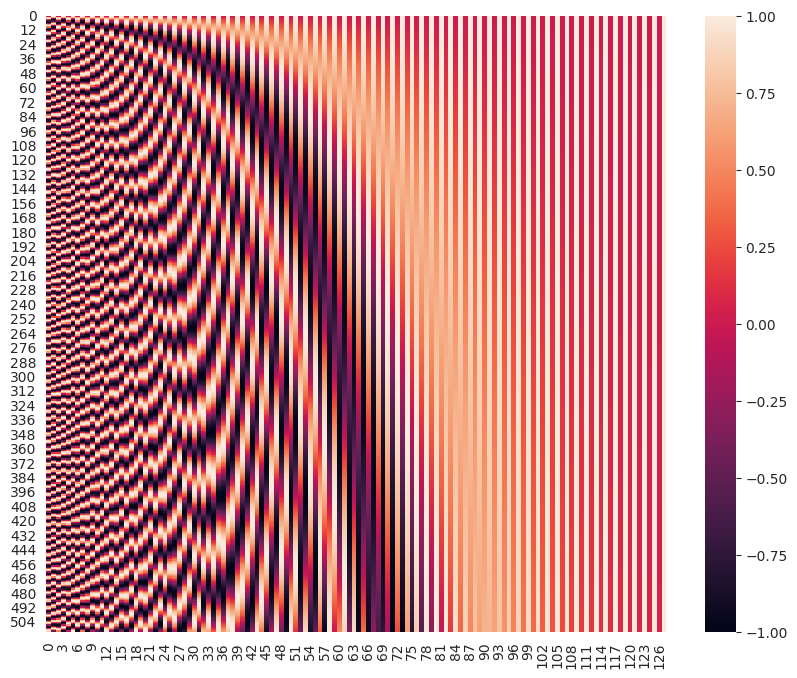

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(positional_encoding)
plt.savefig('sinusoidal_positional_encoding.png', dpi=600)

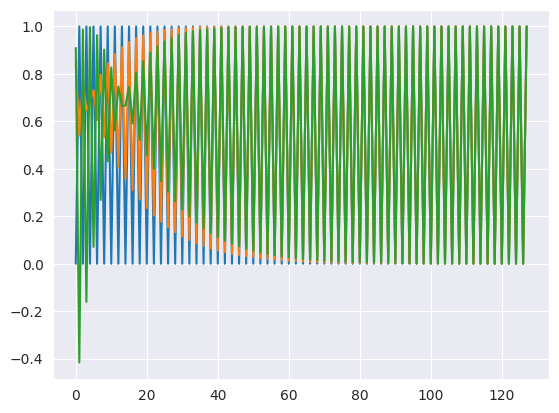

In [20]:
for i in range(3):
    plt.plot(positional_encoding[i, :])
plt.show()